In [ ]:
!pip install tensorflowjs


In [ ]:
import os
import cv2
import time
import keras
import shutil
import requests
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input

In [ ]:
!mkdir Beagle
!mkdir Bernes_Mountain
!mkdir Corgi
!mkdir Dalmata
!mkdir Golden_Retriever
!mkdir Pastor_Aleman


In [ ]:
# %cd Beagle
# !unzip Beagle.zip
# %cd ..

# %cd Bernes_Mountain
# !unzip Bernes_Mountain.zip
# %cd ..

# %cd Corgi
# !unzip Corgi.zip
# %cd ..

# %cd Dalmata
# !unzip Dalmata.zip
# %cd ..

# %cd Golden_Retriever
# !unzip Golden_Retriever.zip
# %cd ..

# %cd Pastor_Aleman
# !unzip Pastor_Aleman.zip
# %cd ..



In [ ]:
!rm -rf /content/Beagle/Beagle.zip
!rm -rf /content/Bernes_Mountain/Bernes_Mountain.zip
!rm -rf /content/Corgi/Corgi.zip
!rm -rf /content/Dalmata/Dalmata.zip
!rm -rf /content/Golden_Retriever/Golden_Retriever.zip
!rm -rf /content/Pastor_Aleman/Pastor_Aleman.zip


In [ ]:
!mkdir dataset
!mkdir dataset/Beagle
!mkdir dataset/Bernes_Mountain
!mkdir dataset/Corgi
!mkdir dataset/Dalmata
!mkdir dataset/Golden_Retriever
!mkdir dataset/Pastor_Aleman


In [ ]:
import shutil
carpeta_fuente = '/content/Beagle/Beagle'
carpeta_destino = '/content/dataset/Beagle'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 500:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)



In [ ]:
carpeta_fuente = '/content/Bernes_Mountain/Bernes_Mountain'
carpeta_destino = '/content/dataset/Bernes_Mountain'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 500:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/Corgi/Corgi'
carpeta_destino = '/content/dataset/Corgi'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 500:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/Dalmata/Dalmata'
carpeta_destino = '/content/dataset/Dalmata'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 500:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/Golden_Retriever/Golden_Retriever'
carpeta_destino = '/content/dataset/Golden_Retriever'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 500:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/Pastor_Aleman/Pastor_Aleman'
carpeta_destino = '/content/dataset/Pastor_Aleman'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 500:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
!ls /content/dataset/Beagle | wc -l
!ls /content/dataset/Bernes_Mountain | wc -l
!ls /content/dataset/Corgi | wc -l
!ls /content/dataset/Dalmata | wc -l
!ls /content/dataset/Golden_Retriever | wc -l
!ls /content/dataset/Pastor_Aleman | wc -l

500
500
500
500
500
500


Found 2398 images belonging to 6 classes.
Found 599 images belonging to 6 classes.


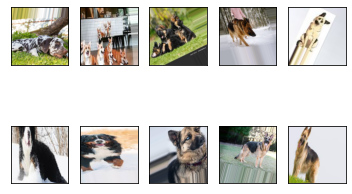

In [ ]:
#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(6, activation='softmax')
])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 5

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas)

Epoch 1/5
75/75 [==============================] - 167s 2s/step - loss: 0.6655 - accuracy: 0.7794 - val_loss: 0.2300 - val_accuracy: 0.9349
Epoch 2/5
75/75 [==============================] - 167s 2s/step - loss: 0.3345 - accuracy: 0.8941 - val_loss: 0.2075 - val_accuracy: 0.9349
Epoch 3/5
75/75 [==============================] - 167s 2s/step - loss: 0.3065 - accuracy: 0.8966 - val_loss: 0.2086 - val_accuracy: 0.9432
Epoch 4/5
75/75 [==============================] - 166s 2s/step - loss: 0.2921 - accuracy: 0.9058 - val_loss: 0.2008 - val_accuracy: 0.9349
Epoch 5/5
75/75 [==============================] - 167s 2s/step - loss: 0.2596 - accuracy: 0.9133 - val_loss: 0.1877 - val_accuracy: 0.9316


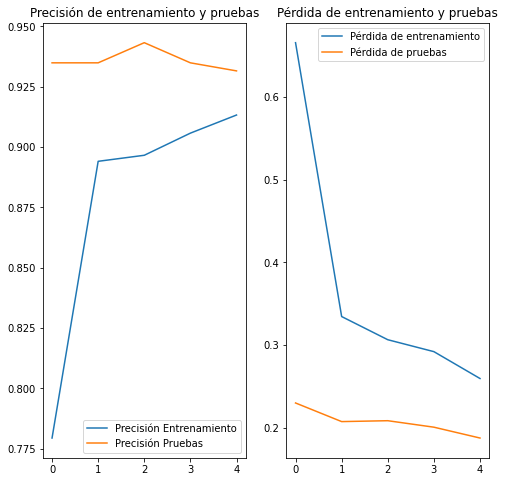

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [ ]:
class_names=['Beagle','Bernés de la Montaña','Corgi','Dalmata','Golden_Retriever','Pastor Alemán']

1/1 [==============================] - 0s 98ms/step
Es un Beagle


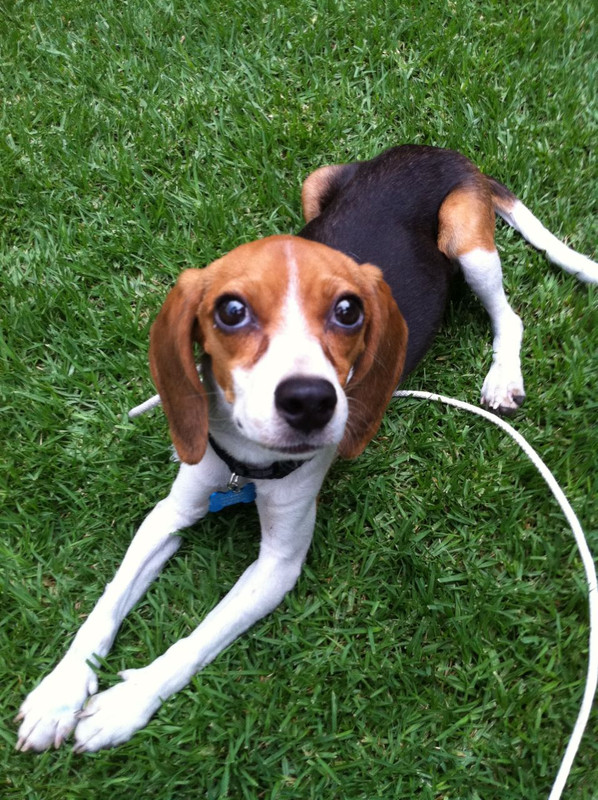

In [ ]:

url = 'https://i.postimg.cc/NFYBKwJX/Whats-App-Image-2023-02-10-at-12-42-25.jpg' 
prediccion = categorizar (url)
print("Es un", class_names[prediccion])
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [ ]:
# PARAMETROS
width_shape = 224
height_shape = 224
num_classes = 6
epochs = 15
batch_size = 32 
train_samples =6853
test_samples = 1703

In [ ]:
model2 = MobileNetV2(weights='imagenet')
model2.summary()

dog_outpout = Dense(6, activation='softmax')
dog_outpout = dog_outpout(model2.layers[-2].output)
dog_input= model2.input
dog_model = Model(inputs = dog_input, outputs=dog_outpout)

for layer in dog_model.layers[:-1]:
  layer.trainable = False

dog_model.summary()


dog_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_history = dog_model.fit(  
    data_gen_entrenamiento,
    epochs=epochs,
    validation_data=data_gen_pruebas)

Epoch 1/15
32/32 [==============================] - 76s 2s/step - loss: 0.5781 - accuracy: 0.7728 - val_loss: 0.2742 - val_accuracy: 0.9116
Epoch 2/15
32/32 [==============================] - 79s 2s/step - loss: 0.2965 - accuracy: 0.8800 - val_loss: 0.2122 - val_accuracy: 0.8996
Epoch 3/15
32/32 [==============================] - 75s 2s/step - loss: 0.2653 - accuracy: 0.9018 - val_loss: 0.1624 - val_accuracy: 0.9438
Epoch 4/15
32/32 [==============================] - 76s 2s/step - loss: 0.2275 - accuracy: 0.9167 - val_loss: 0.1219 - val_accuracy: 0.9719
Epoch 5/15
32/32 [==============================] - 71s 2s/step - loss: 0.2217 - accuracy: 0.9117 - val_loss: 0.1704 - val_accuracy: 0.9277
Epoch 6/15
32/32 [==============================] - 71s 2s/step - loss: 0.2033 - accuracy: 0.9266 - val_loss: 0.1082 - val_accuracy: 0.9719
Epoch 7/15
32/32 [==============================] - 75s 2s/step - loss: 0.1983 - accuracy: 0.9266 - val_loss: 0.1147 - val_accuracy: 0.9598
Epoch 8/15
32/32 [==

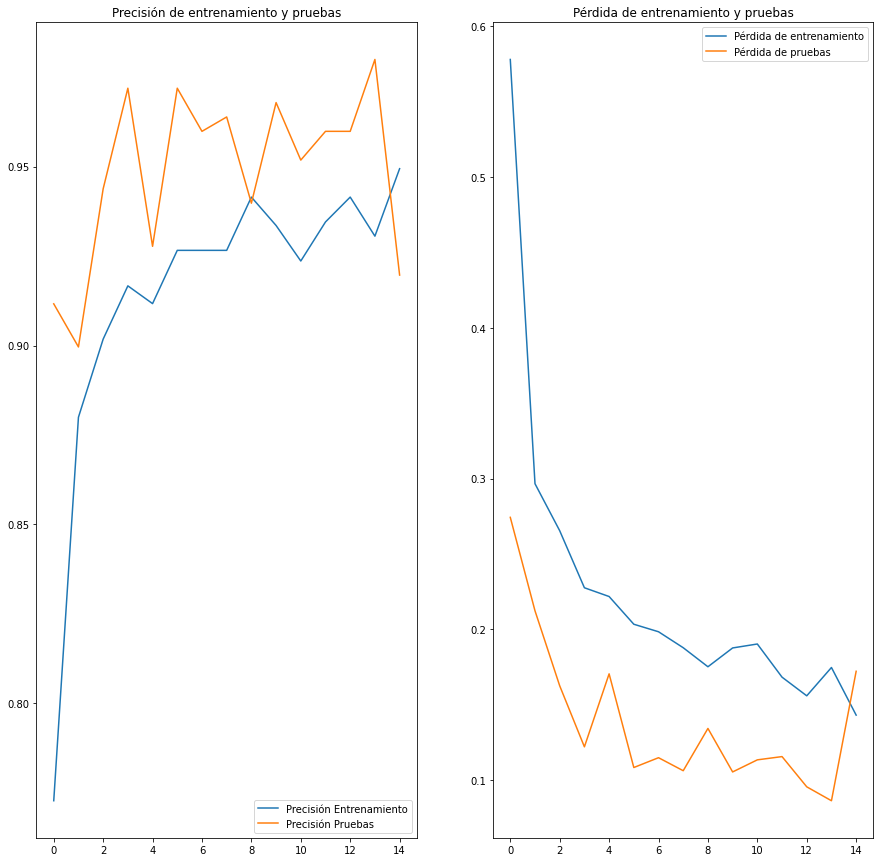

In [ ]:
#Graficas de precisión
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

rango_epocas = range(epochs)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = dog_model.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
url = 'https://i.postimg.cc/rmsqwS8x/Whats-App-Image-2023-03-09-at-10-46-05.jpg' #debe ser 2
prediccion = categorizar (url)
print("Es un", class_names[prediccion])

1/1 [==============================] - 0s 65ms/step
Es un Boxer


In [ ]:
dog_model.save('dogmodel.h5')

In [ ]:
!mkdir carpeta_salida

In [ ]:
!tensorflowjs_converter --input_format keras dogmodel.h5 carpeta_salida

2023-03-10 01:17:06.529702: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-10 01:17:06.529860: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-10 01:17:06.529884: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [ ]:
!zip -r /content/carpeta_salida/modeldata.zip /content/carpeta_salida

  adding: content/carpeta_salida/ (stored 0%)
  adding: content/carpeta_salida/saved_model.h5 (deflated 11%)
  adding: content/carpeta_salida/model.json (deflated 96%)
  adding: content/carpeta_salida/group1-shard3of3.bin (deflated 7%)
  adding: content/carpeta_salida/group1-shard1of3.bin (deflated 7%)
  adding: content/carpeta_salida/group1-shard2of3.bin (deflated 7%)


In [ ]:
# Intentemos otros modelos


In [ ]:


modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(6, activation='softmax')
  ])

In [ ]:


modeloCNN2.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
epochs=50

model_history = modeloCNN2.fit(  
    data_gen_entrenamiento,
    epochs=epochs,
    validation_data=data_gen_pruebas)

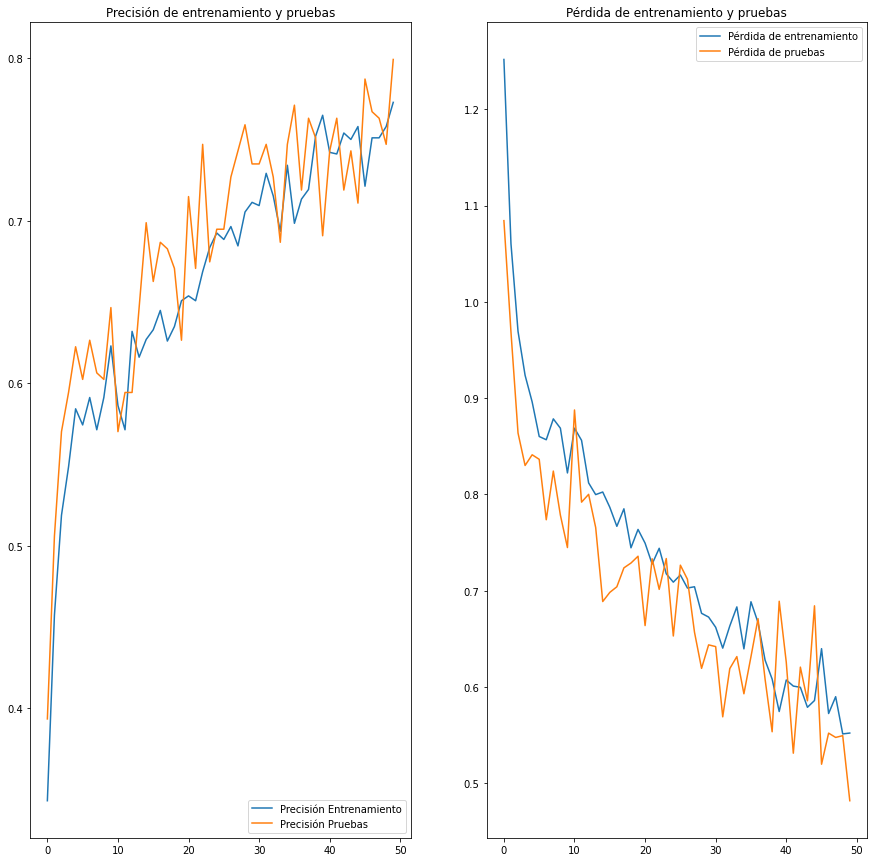

In [ ]:

#Graficas de precisión
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modeloCNN2.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
url = "https://www.google.com/url?sa=i&url=http%3A%2F%2Fwww.beaglepro.com%2Fsenior-beagles&psig=AOvVaw0UtEDRNE81TyJmWeOFnxV8&ust=1678514341457000&source=images&cd=vfe&ved=0CA8QjRxqFwoTCPDriKrX0P0CFQAAAAAdAAAAABAE" #debe ser 2
prediccion = categorizar (url)
print("Es un", class_names[prediccion])
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

UnidentifiedImageError: ignored

In [ ]:
modeloCNN2.save('perrosrazas.h5')

In [ ]:

!mkdir carpeta_salida2

mkdir: cannot create directory ‘carpeta_salida2’: File exists


In [ ]:
!tensorflowjs_converter --input_format keras perrosrazas.h5 carpeta_salida2

2023-03-10 05:46:37.430713: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-10 05:46:37.430912: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-10 05:46:37.430932: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [ ]:
!zip -r /content/carpeta_salida2/modeldata.zip /content/carpeta_salida2

  adding: content/carpeta_salida2/ (stored 0%)
  adding: content/carpeta_salida2/group1-shard7of21.bin (deflated 7%)
  adding: content/carpeta_salida2/group1-shard13of21.bin (deflated 7%)
  adding: content/carpeta_salida2/group1-shard5of21.bin (deflated 7%)
  adding: content/carpeta_salida2/group1-shard1of21.bin (deflated 7%)
  adding: content/carpeta_salida2/group1-shard6of21.bin (deflated 7%)
  adding: content/carpeta_salida2/group1-shard21of21.bin (deflated 7%)
  adding: content/carpeta_salida2/group1-shard8of21.bin (deflated 7%)
  adding: content/carpeta_salida2/group1-shard17of21.bin (deflated 7%)
  adding: content/carpeta_salida2/group1-shard3of21.bin (deflated 7%)
  adding: content/carpeta_salida2/group1-shard4of21.bin (deflated 7%)
  adding: content/carpeta_salida2/model.json (deflated 82%)
  adding: content/carpeta_salida2/group1-shard2of21.bin (deflated 7%)
  adding: content/carpeta_salida2/group1-shard15of21.bin (deflated 7%)
  adding: content/carpeta_salida2/group1-shard19o